In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# "C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6\02 Data\Prepared Data\rgs_csv"
path = r'C:\Users\asus\CareerFoundry\CareerFoundry Acheivement 6'

In [5]:
rgs = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'rgs_csv'), index_col = 0)

In [6]:
rgs.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral team scorer  minute own_goal penalty winner  \
0  Scotland    False  NaN    NaN     NaN      NaN     NaN    NaN   
1   England    False  NaN    NaN     NaN      NaN     NaN    NaN   
2  Scotland    False  NaN    NaN     NaN      NaN     NaN    NaN   
3   England    False  NaN    NaN     NaN      NaN     NaN    NaN   
4  Scotland    False  NaN    NaN     NaN      NaN     NaN    NaN   

  first_shooter match_time match_winner country_match_winner  
0           NaN        NaN         draw                  NaN  
1           NaN        NaN     home win              England  
2           NaN        NaN     home win             Scotland  
3           NaN        NaN         draw                  NaN  
4           NaN        NaN     home win             Scotland

In [29]:
rgs[['home_score', 'away_score',]]

NameError: name 'dropna' is not defined

In [30]:
rgs_short = rgs[['home_score', 'away_score']]

In [31]:
rgs_short.head()

home_score  away_score
0           0           0
1           4           2
2           2           1
3           2           2
4           3           0

In [32]:
rgs_short.shape

(74518, 2)

In [33]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [34]:
score = [kmeans[i].fit(rgs_short).score(rgs_short) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[-559413.9710673793,
 -338192.9195765163,
 -232222.16024708765,
 -170853.25355735703,
 -142713.73369700415,
 -117981.45271586766,
 -102044.0509905861,
 -87282.83326949208,
 -79585.69051880103]

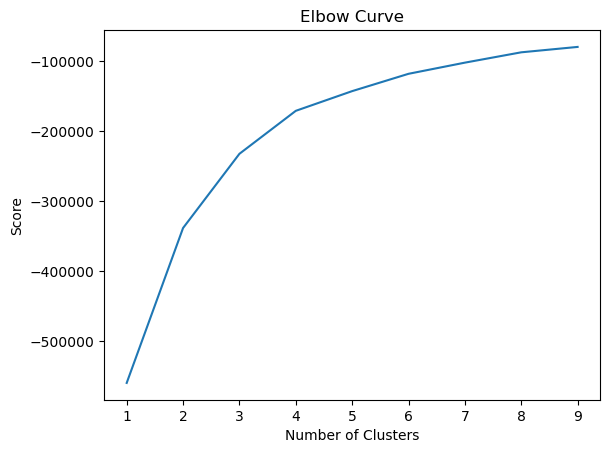

In [35]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [44]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 6) 


In [45]:
# Fit the k-means object to the data.

kmeans.fit(rgs_short)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [46]:
rgs_short['clusters'] = kmeans.fit_predict(rgs_short)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\asus\AppData\Local\Temp\ipykernel_24528\2210830196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rgs_short['clusters'] = kmeans.fit_predict(rgs_short)


In [47]:
rgs_short.head()

home_score  away_score  clusters
0           0           0         0
1           4           2         3
2           2           1         2
3           2           2         2
4           3           0         2

In [48]:
rgs_short['clusters'].value_counts()

clusters
2    22878
0    17606
1    13665
3    11081
5     6064
4     3224
Name: count, dtype: int64

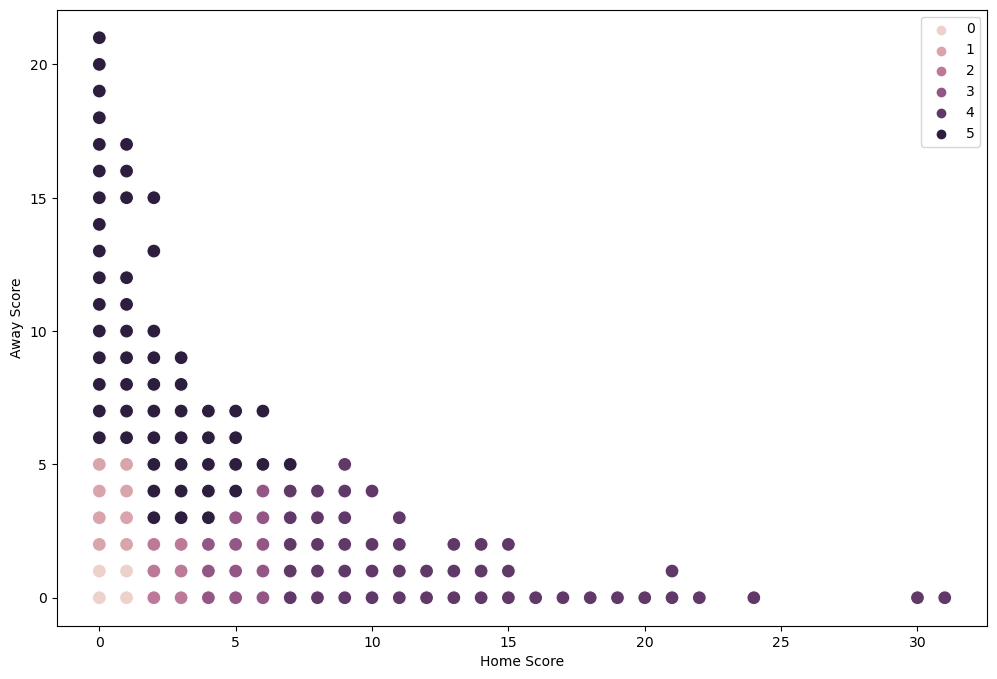

In [49]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=rgs_short['home_score'], y=rgs_short['away_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Home Score') # Label x-axis.
plt.ylabel('Away Score') # Label y-axis.
plt.show()

## I broke this graph up into 6 cluster. The clusters are all pretty close together which makes it harder to tell apart but some of the clusters are clear in which the stand. The two darkest shades show the high scoring games which happen less frequently as the lighter shades that are clustered closer together.

In [52]:
rgs_short.loc[rgs_short['clusters'] == 0, 'cluster'] = 'tan'
rgs_short.loc[rgs_short['clusters'] == 1, 'cluster'] = 'salmon'
rgs_short.loc[rgs_short['clusters'] == 2, 'cluster'] = 'pink'
rgs_short.loc[rgs_short['clusters'] == 3, 'cluster'] = 'purple'
rgs_short.loc[rgs_short['clusters'] == 4, 'cluster'] = 'plum purple'
rgs_short.loc[rgs_short['clusters'] == 5, 'cluster'] = 'darkest purple'

C:\Users\asus\AppData\Local\Temp\ipykernel_24528\3244131258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rgs_short.loc[rgs_short['clusters'] == 0, 'cluster'] = 'tan'


In [54]:
rgs_short.groupby('cluster').agg({'home_score':['mean', 'median'], 
                         'away_score':['mean', 'median']})

home_score        away_score       
                     mean median       mean median
cluster                                           
darkest purple   1.960422    2.0   4.701682    4.0
pink             2.394003    2.0   0.855757    1.0
plum purple      9.063275    8.0   0.394851    0.0
purple           4.679812    4.0   0.702915    1.0
salmon           0.543066    1.0   2.806293    3.0
tan              0.608543    1.0   0.525446    1.0

## This chart and data has limited use on its own. If other data was to be paired with this data, it could be used to determine the achievements of a country and the dominance and/or capabilities of a country or lack thereof.